 #  A Whale off the Port(folio)
 ---

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning


## Whale Returns


In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
df.sort_index(ascending = True, inplace = True)
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
df.isnull().mean() * 100
df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
df.dropna(how="any", inplace=True)

## Algorithmic Daily Returns


In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().mean() *100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$","")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_returns.pct_change
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close":"S&P500"})
sp500_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df = pd.concat([df,algo_returns_df, sp500_returns], axis= "columns", join="inner")
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis


## Performance Anlysis


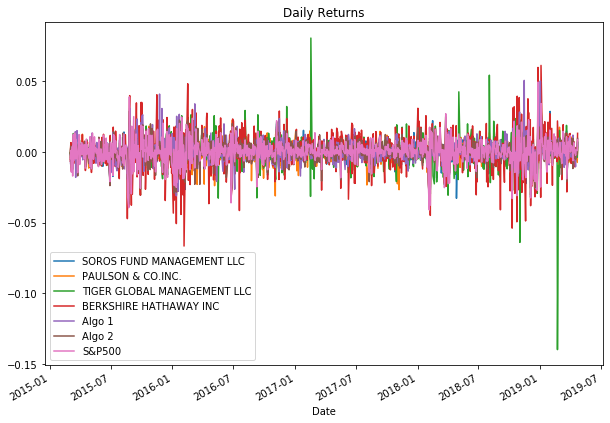

In [17]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot( title="Daily Returns" , figsize=(10,7))

#### Calculate and Plot cumulative returns.

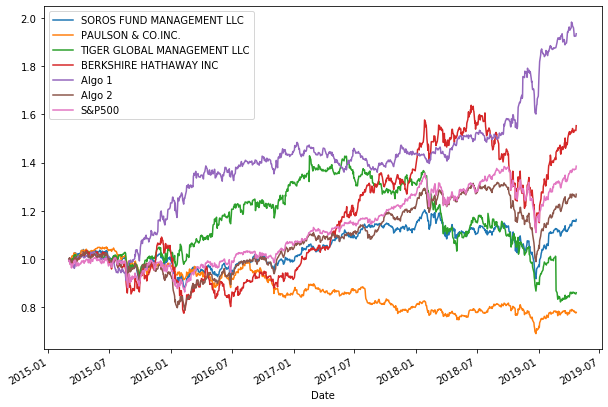

In [18]:
# Calculate cumulative returns of all portfolios
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
# Plot cumulative returns
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(10,7))

---

## Risk Analysis


### Create a box plot for each portfolio


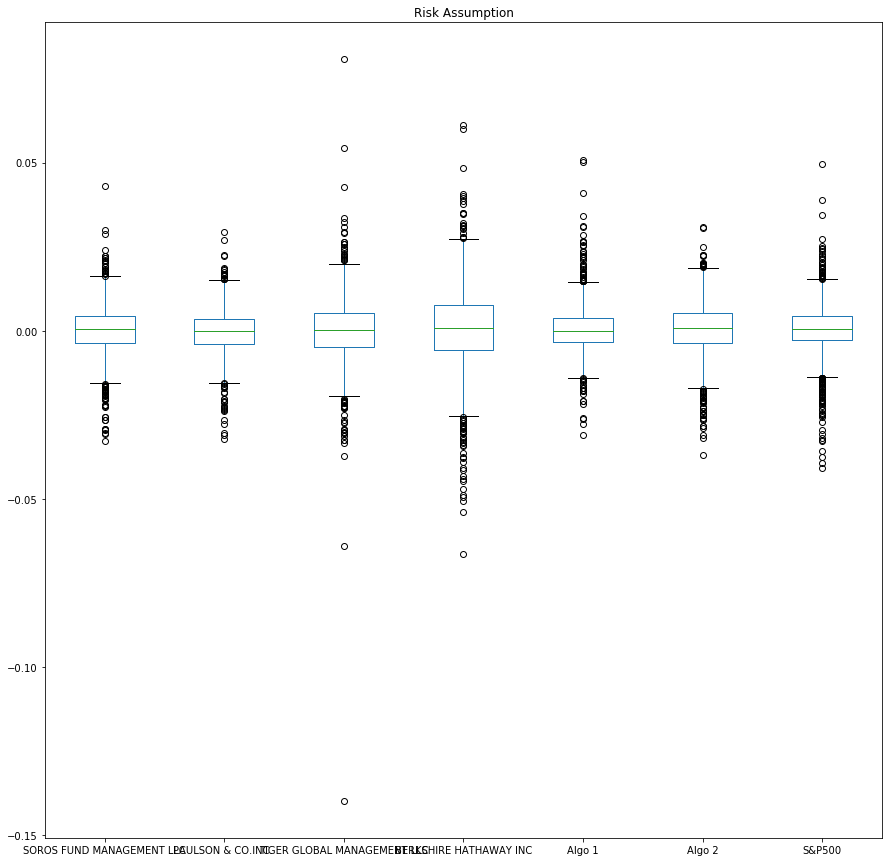

In [19]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title= "Risk Assumption", figsize=(15,15))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_stndrd_dev = combined_portfolios_df.std().sort_values(ascending=False)
daily_stndrd_dev

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_history['daily_return'] = (sp500_history.shift(1)) -1
sp500_history.dropna(inplace = True)
# Determine which portfolios are riskier than the S&P 500
risky_portfolios = [daily_stndrd_dev > daily_stndrd_dev["S&P500"]]
risky_portfolios

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 S&P500                         False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = daily_stndrd_dev*np.sqrt(252)
df_annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

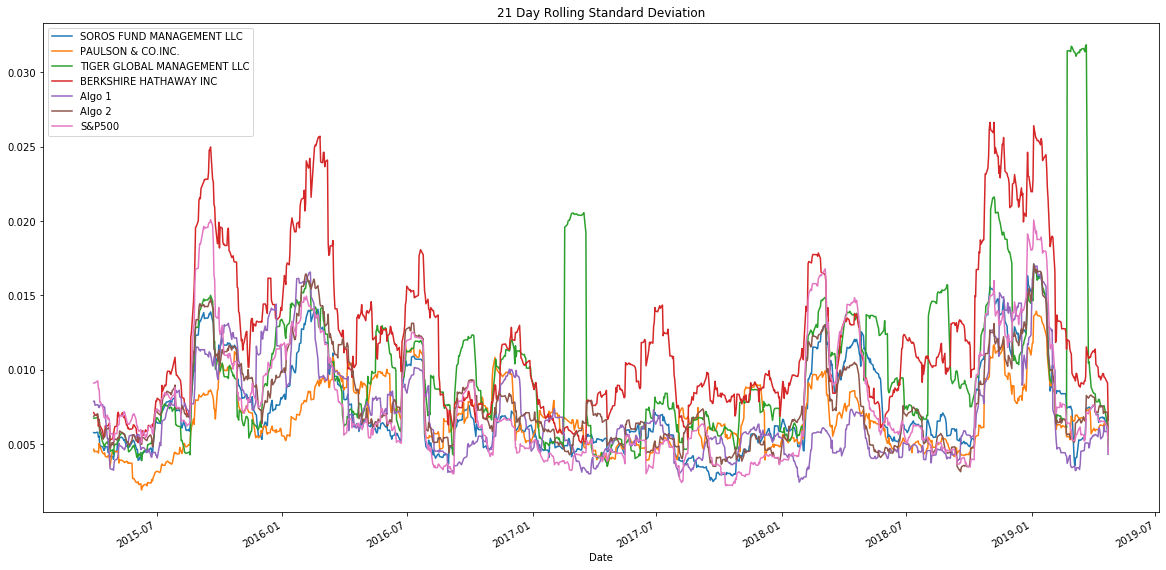

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
combined_portfolios_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

Text(0.5, 1, 'Correlation')

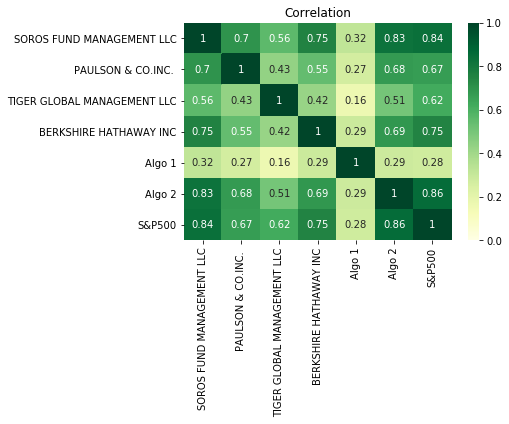

In [21]:
# Calculate the correlation

# Display de correlation matrix
correlation = combined_portfolios_df.corr()
sns.heatmap(correlation, vmin=0, vmax=1, cmap="YlGn", annot=True).set_title("Correlation")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

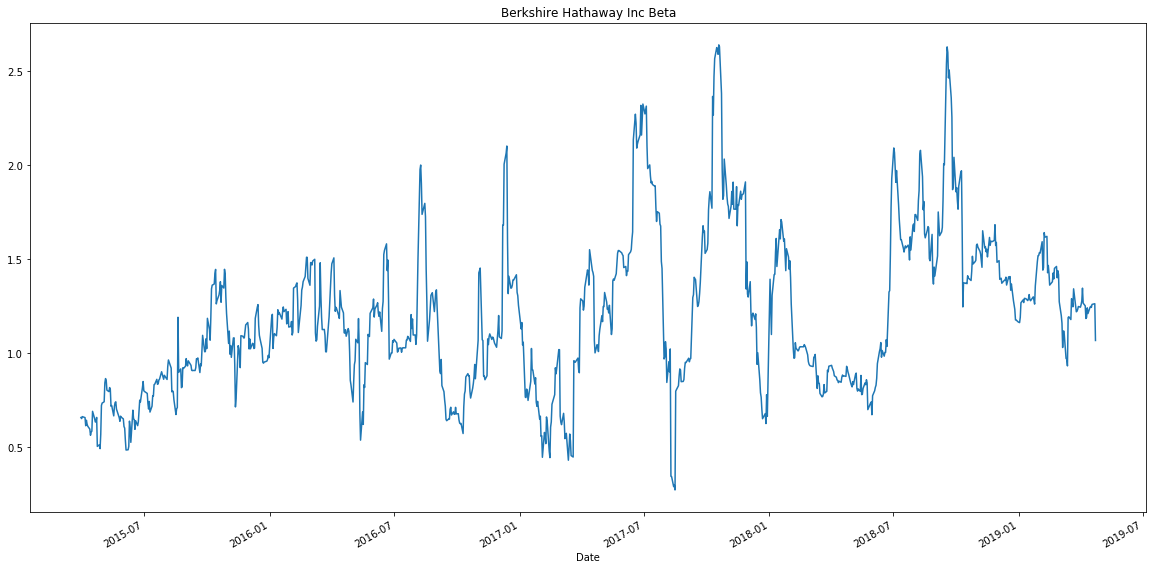

In [22]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_portfolios_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_portfolios_df["S&P500"])
# Calculate variance of S&P 500
rolling_variance = combined_portfolios_df['S&P500'].rolling(window=21).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20,10), title="Berkshire Hathaway Inc Beta")

## Rolling Statistics: Exponentially Weighted Average 



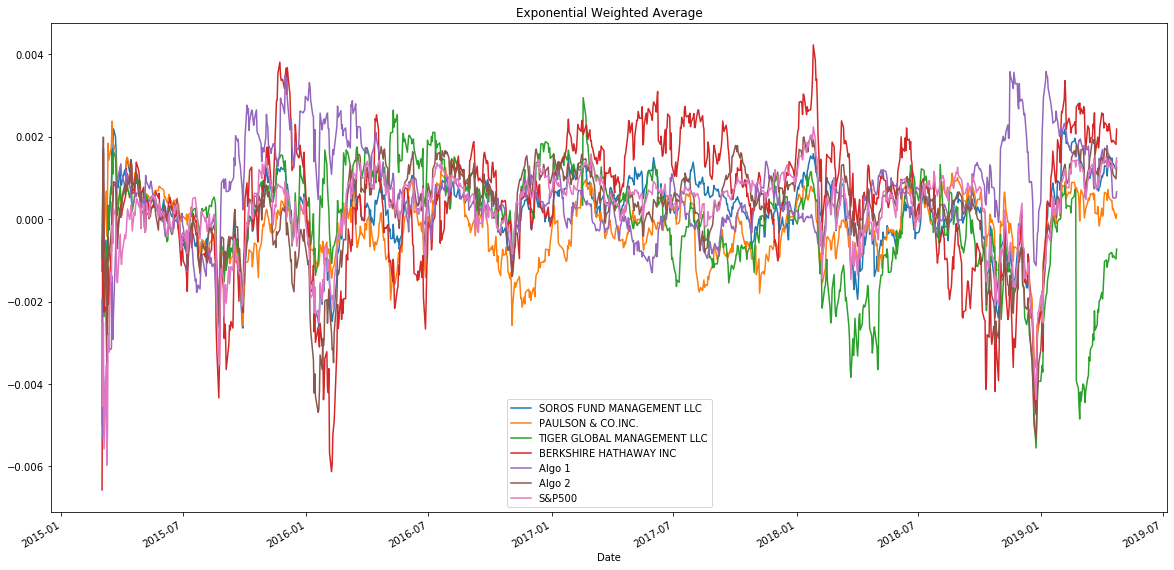

In [25]:
# Use `ewm` to calculate the rolling window
expo_rolling_window = combined_portfolios_df.ewm(halflife=21).mean()
expo_rolling_window.plot(figsize=(20,10), title="Exponential Weighted Average")

---

# Sharpe Ratios


In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

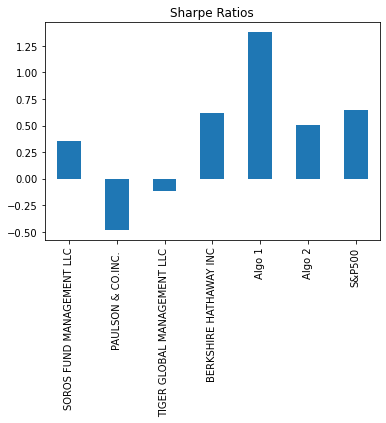

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.



---

# Create Custom Portfolio



## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.


* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
goog_historical = pd.read_csv(Path("Resources/goog_historical.csv"), index_col= "Trade DATE",
                             parse_dates = True, infer_datetime_format= True)
goog_historical.rename(columns = {"Close": "GOOG"}, inplace= True)
goog_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [28]:
# Reading data from 2nd stock
cost_historical = pd.read_csv(Path("Resources/cost_historical.csv"), index_col= "Trade DATE",
                             parse_dates = True, infer_datetime_format= True)
cost_historical.rename(columns = {"Close": "COST"}, inplace= True)
cost_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [29]:
# Reading data from 3rd stock
aapl_historical = pd.read_csv(Path("Resources/aapl_historical.csv"), index_col= "Trade DATE",
                             parse_dates = True, infer_datetime_format= True)
aapl_historical.rename(columns = {"Close": "AAPL"}, inplace= True)
aapl_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [30]:
# Combine all stocks in a single DataFrame
combined_shares_port = pd.concat([aapl_historical,cost_historical, goog_historical], axis= "columns", join="inner")
combined_shares_port.sort_index(ascending = True, inplace=True)
combined_shares_port.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59


In [75]:
# Reset Date index


In [72]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [78]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!